In [1]:
# remove the notebook root logger.\n",
import logging
logger = logging.getLogger()
logger.handlers = []

%matplotlib inline

In [2]:
import pandas as pd


csvfile_link = "https://raw.githubusercontent.com/antoinecarme/pyaf/master/data/passengers_train.csv"
air_passengers_dataframe = pd.read_csv(csvfile_link);
import datetime
air_passengers_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             144 non-null    int64  
 1   time           144 non-null    float64
 2   AirPassengers  144 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.5 KB


In [3]:
def create_model(iActivateCrossVal , iFolds):
    import pyaf.ForecastEngine as autof
    lEngine = autof.cForecastEngine()
    if(iActivateCrossVal):
        lEngine.mOptions.mCrossValidationOptions.mMethod = "TSCV";
        lEngine.mOptions.mCrossValidationOptions.mNbFolds = iFolds
    lEngine.train(air_passengers_dataframe[:-12] , 'time' , 'AirPassengers', 12);
    lEngine.getModelInfo();
    return lEngine

In [4]:
model_no_cross_valid = create_model(False , None)
model_with_cross_valid_5 = create_model(True , 5)
model_with_cross_valid_10 = create_model(True , 10)


INFO:pyaf.std:TRAINING_ENGINE_START {'Signals': ['AirPassengers'], 'Horizons': {'AirPassengers': 12}}
INFO:pyaf.std:TRAINING_ENGINE_END 3.542
INFO:pyaf.std:TIME_DETAIL TimeVariable='time' TimeMin=1949.0 TimeMax=1956.91666666667 TimeDelta=0.08333333333336763 Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='AirPassengers' Length=132  Min=104 Max=559  Mean=262.492424 StdDev=106.221146
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='Diff_AirPassengers' Min=-0.221978 Max=0.167033  Mean=0.004878 StdDev=0.068427
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE 'Diff_'
INFO:pyaf.std:BEST_DECOMPOSITION  'Diff_AirPassengers_ConstantTrend_residue_Cycle_12_residue_NoAR' [ConstantTrend + Cycle_12 + NoAR]
INFO:pyaf.std:TREND_DETAIL 'Diff_AirPassengers_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL 'Diff_AirPassengers_ConstantTrend_residue_Cycle_12' [Cycle_12]
INFO:pyaf.std:AUTOREG_DETAIL 'Diff_AirPassengers_ConstantTrend_residu

INFO:pyaf.std:SIGNAL_TRANSFORMATION_DETAIL_START
INFO:pyaf.std:SIGNAL_TRANSFORMATION_MODEL_VALUES NoTransf None
INFO:pyaf.std:SIGNAL_TRANSFORMATION_DETAIL_END
INFO:pyaf.std:TREND_DETAIL_START
INFO:pyaf.std:LAG1_TREND Lag1Trend 0.017582
INFO:pyaf.std:TREND_DETAIL_END
INFO:pyaf.std:CYCLE_MODEL_DETAIL_START
INFO:pyaf.std:BEST_CYCLE_LENGTH_VALUES _AirPassengers_Lag1Trend_residue_Cycle_12 12 0.004396 {0: 0.008791, 1: 0.005495, 2: 0.068132, 3: -0.010989, 4: 0.003297, 5: 0.059341, 6: 0.046154, 7: 0.0, 8: -0.073626, 9: -0.056044, 10: -0.049451, 11: 0.052747}
INFO:pyaf.std:CYCLE_MODEL_DETAIL_END
INFO:pyaf.std:AR_MODEL_DETAIL_START
INFO:pyaf.std:AR_MODEL_DETAIL_END
INFO:pyaf.std:COMPETITION_DETAIL_START 'AirPassengers'
INFO:pyaf.std:COMPETITION_DETAIL_SHORT_LIST 'AirPassengers' 3 {'Model': '_AirPassengers_Lag1Trend_residue_Cycle_12_residue_NoAR', 'Category': 'NoTransf_Lag1Trend_Cycle_12_NoAR', 'Split': None, 'Forecast_MASE_H': 0.4083, 'IC': 1}
INFO:pyaf.std:COMPETITION_DETAIL_END 'AirPassengers'

In [5]:
model_no_cross_valid_forecast = model_no_cross_valid.forecast(air_passengers_dataframe, 12);
model_with_cross_valid_10_forecast = model_with_cross_valid_10.forecast(air_passengers_dataframe, 12);
model_with_cross_valid_5_forecast = model_with_cross_valid_5.forecast(air_passengers_dataframe, 12);


INFO:pyaf.std:FORECASTING_ENGINE_START {'Signals': ['AirPassengers'], 'Horizons': {'AirPassengers': 12}}
INFO:pyaf.std:FORECASTING_ENGINE_END 0.173
INFO:pyaf.std:FORECASTING_ENGINE_START {'Signals': ['AirPassengers'], 'Horizons': {'AirPassengers': 12}}
INFO:pyaf.std:FORECASTING_ENGINE_END 0.173
INFO:pyaf.std:FORECASTING_ENGINE_START {'Signals': ['AirPassengers'], 'Horizons': {'AirPassengers': 12}}
INFO:pyaf.std:FORECASTING_ENGINE_END 0.172


<AxesSubplot: xlabel='time'>

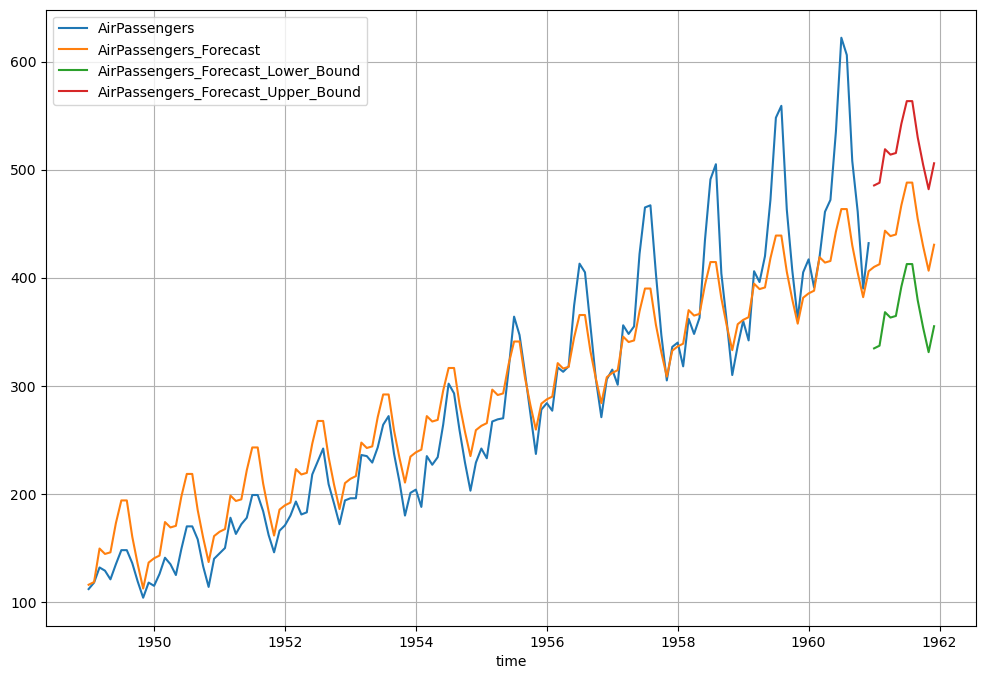

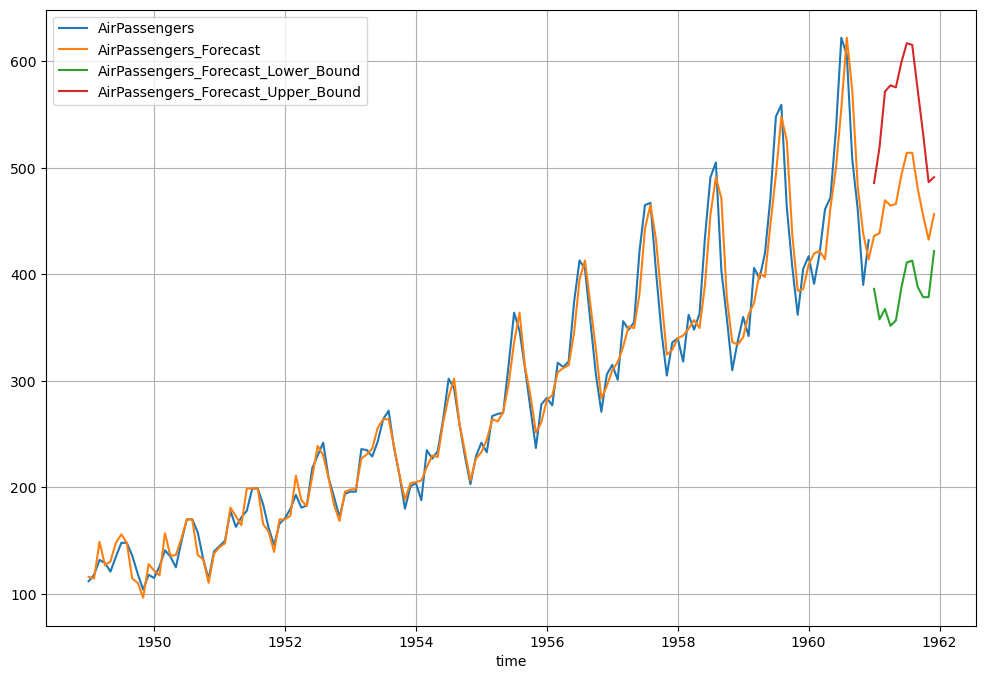

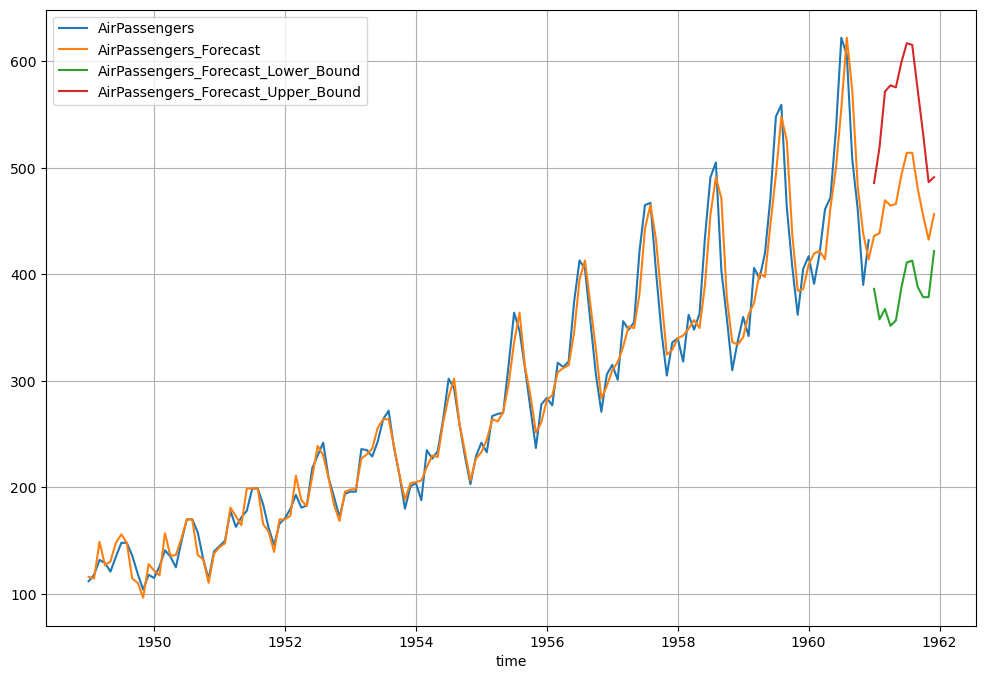

In [6]:
model_no_cross_valid_forecast.plot.line('time', ['AirPassengers' , 'AirPassengers_Forecast', 
                                             'AirPassengers_Forecast_Lower_Bound', 
                                             'AirPassengers_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_10_forecast.plot.line('time', ['AirPassengers' , 'AirPassengers_Forecast', 
                                             'AirPassengers_Forecast_Lower_Bound', 
                                             'AirPassengers_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_5_forecast.plot.line('time', ['AirPassengers' , 'AirPassengers_Forecast', 
                                             'AirPassengers_Forecast_Lower_Bound', 
                                             'AirPassengers_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
